In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Task 1 : Cell Detection

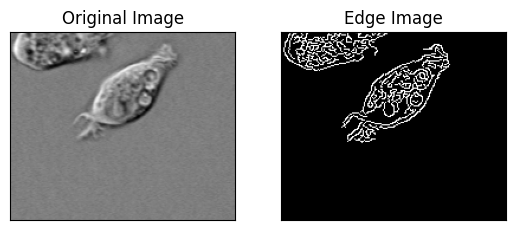

In [5]:
# Read image of cell
img1 = cv2.imread('demo3_images/cell.png', 0)

# Run canny edge detection
edges = cv2.Canny(img1, 30, 200)

# Display images side by side
plt.subplot(121), plt.imshow(img1, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

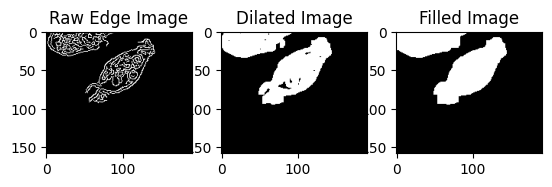

In [11]:
# Morphological operations

# Dilate the image
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(edges, kernel, iterations=1)

# Fill only interior gaps using morphological operations
kernel_2 = np.ones((7, 7), np.uint8)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_2)

# Show the raw edge image, dilated image, and filled image
plt.subplot(131), plt.imshow(edges, cmap='gray'); plt.title('Raw Edge Image')
plt.subplot(132), plt.imshow(dilation, cmap='gray'); plt.title('Dilated Image')
plt.subplot(133), plt.imshow(closing, cmap='gray'); plt.title('Filled Image')
plt.show()

img_2_moDone = closing

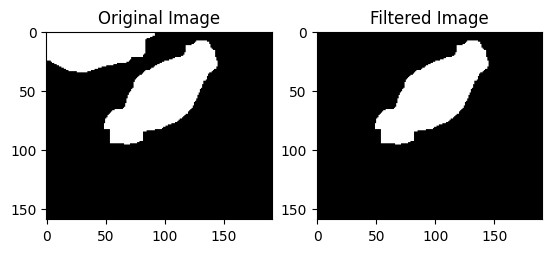

In [12]:
# Get image dimensions
height, width = img_2_moDone.shape

# Find contours
contours, _ = cv2.findContours(img_2_moDone, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Function to check if a contour is on the boundary
def is_contour_on_boundary(contour, width, height):
    for point in contour:
        x, y = point[0]
        if x == 0 or y == 0 or x == width - 1 or y == height - 1:
            return True
    return False

# Filter out contours on the boundary
filtered_contours = [contour for contour in contours if not is_contour_on_boundary(contour, width, height)]

# Create an empty image to draw the filtered contours
filtered_image = np.zeros_like(img_2_moDone)

# Draw the filtered contours
cv2.drawContours(filtered_image, filtered_contours, -1, (255), thickness=cv2.FILLED)

# Display img_2_moDone and filtered_image
plt.subplot(121), plt.imshow(img_2_moDone, cmap='gray'); plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'); plt.title('Filtered Image')
plt.show()

Task 2 : Fake Coin Detection

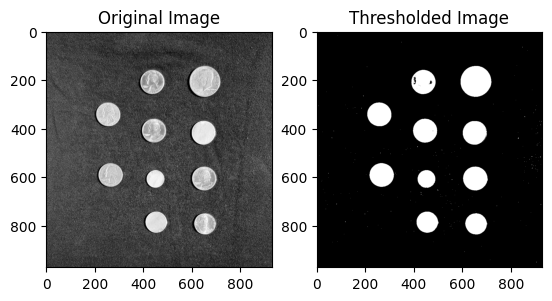

In [3]:
img_coin_1 = cv2.imread('demo3_images/testCoinImage1.png', 0)

# Threshold the image
_, img_coin_2 = cv2.threshold(img_coin_1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# invert the image
img_coin_2 = cv2.bitwise_not(img_coin_2)

# Display img_coin_1 and img_coin_2 side by side
plt.subplot(121), plt.imshow(img_coin_1, cmap='gray'); plt.title('Original Image')
plt.subplot(122), plt.imshow(img_coin_2, cmap='gray'); plt.title('Thresholded Image')
plt.show()

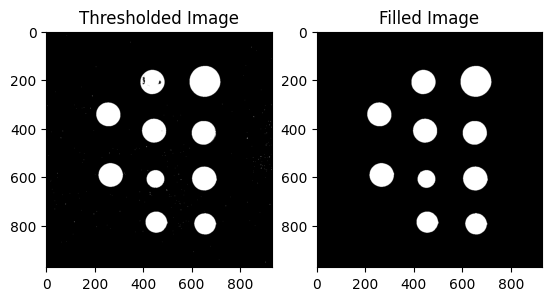

In [4]:
# Fill interior gaps using morphological operations
kernel = np.ones((9, 9), np.uint8)
img_coin_3 = cv2.morphologyEx(img_coin_2, cv2.MORPH_CLOSE, kernel)

# Remove the small white regions (salt noise) using morphological operations
kernel = np.ones((3, 3), np.uint8)
img_coin_3 = cv2.morphologyEx(img_coin_3, cv2.MORPH_OPEN, kernel)

# Display img_coin_1 and img_coin_3 side by side
plt.subplot(121), plt.imshow(img_coin_2, cmap='gray'); plt.title('Thresholded Image')
plt.subplot(122), plt.imshow(img_coin_3, cmap='gray'); plt.title('Filled Image')
plt.show()


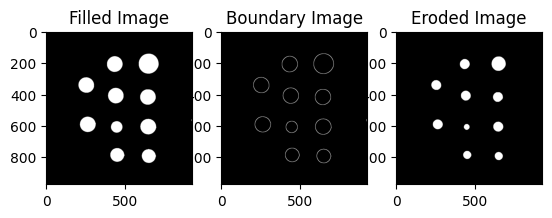

In [47]:
# Create a image of the boundary of the filled image
kernel = np.ones((3, 3), np.uint8)
boundary = cv2.dilate(img_coin_3, kernel, iterations=1) - cv2.erode(img_coin_3, kernel, iterations=1)

# Create a smaller coin image by erosion
# Create a circular structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (19,19))
eroded = cv2.erode(img_coin_3, kernel, iterations=2)

# Display img_coin_3, boundary and eroded side-by-side
plt.subplot(131), plt.imshow(img_coin_3, cmap='gray'); plt.title('Filled Image')
plt.subplot(132), plt.imshow(boundary, cmap='gray'); plt.title('Boundary Image')
plt.subplot(133), plt.imshow(eroded, cmap='gray'); plt.title('Eroded Image')
plt.show()

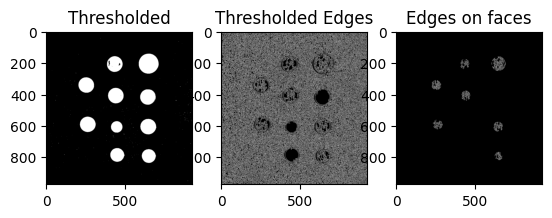

In [48]:
# Run canny edge detection on img_coin_1
edges_1 = cv2.Canny(img_coin_1, 30, 200)

# Threshold edges_1
_, edges_2 = cv2.threshold(edges_1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Invert the image
edges_2 = cv2.bitwise_not(edges_2)

# Take bitwise AND of edges_2 and eroded
edges_3 = cv2.bitwise_and(edges_2, eroded)

# Display img_coin_2, edges_2, and edges_3 side-by-side
plt.subplot(131), plt.imshow(img_coin_2, cmap='gray'); plt.title('Thresholded')
plt.subplot(132), plt.imshow(edges_2, cmap='gray'); plt.title('Thresholded Edges')
plt.subplot(133), plt.imshow(edges_3, cmap='gray'); plt.title('Edges on faces')
plt.show()

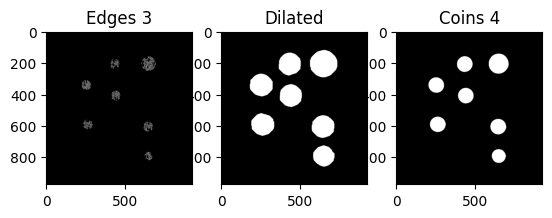

In [50]:
# Dilate edges_3
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
dilated = cv2.dilate(edges_3, kernel, iterations=7)

# Take bitwise AND of dilated and img_coin_3
img_coins_4 = cv2.bitwise_and(dilated, img_coin_3)

# Display edges_3,dilated, img_coins_4 side-by-side
plt.subplot(131), plt.imshow(edges_3, cmap='gray'); plt.title('Edges 3')
plt.subplot(132), plt.imshow(dilated, cmap='gray'); plt.title('Dilated')
plt.subplot(133), plt.imshow(img_coins_4, cmap='gray'); plt.title('Coins 4')
plt.show()


Task 3: Gear Defect Detection

In [53]:
def create_annulus(radius_outer, radius_inner, size):
    # Create a blank image with zeros
    annulus = np.zeros((size, size), dtype=np.uint8)
    
    # Define the center of the circles
    center = (size // 2, size // 2)
    
    # Draw the outer circle (filled)
    cv2.circle(annulus, center, radius_outer, 1, thickness=-1)
    
    # Draw the inner circle (filled) with zeros to create the annulus
    cv2.circle(annulus, center, radius_inner, 0, thickness=-1)
    
    return annulus



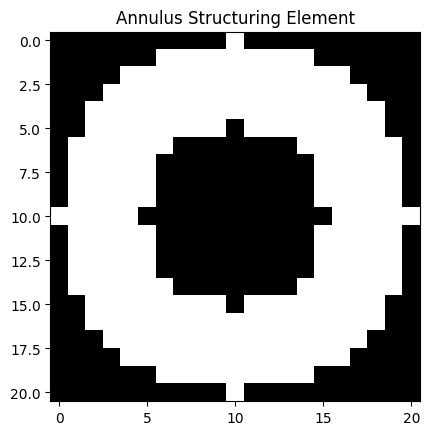

In [ ]:
radius_outer = 25
radius_inner = 20
size = 21  # Size of the structuring element (should be larger than radius_outer)

strel_annulus = create_annulus(radius_outer, radius_inner, size)

# Display the annulus
plt.imshow(annulus, cmap='gray')
plt.title('Annulus Structuring Element')
plt.show()

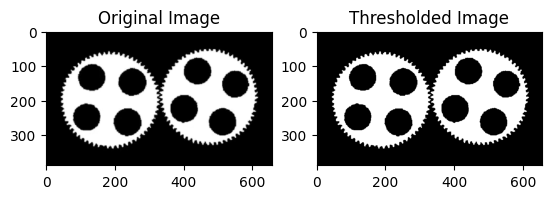

In [58]:
# Load the image
img_g_1 = cv2.imread('demo3_images/defectiveGears.jpg', 0)

# Threshold the image
_, img_g_2 = cv2.threshold(img_g_1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Invert the image
img_g_2 = cv2.bitwise_not(img_g_2)

# Display the original and thresholded images side-by-side
plt.subplot(121), plt.imshow(img_g_1, cmap='gray'); plt.title('Original Image')
plt.subplot(122), plt.imshow(img_g_2, cmap='gray'); plt.title('Thresholded Image')
plt.show()


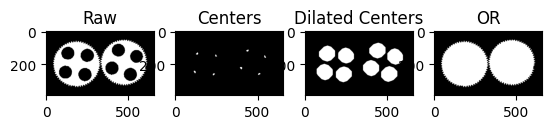

In [ ]:
radius_outer = 50
radius_inner = radius_outer - 2
size = 2*radius_outer+5  # Size of the structuring element (should be larger than radius_outer)
strel_annulus = create_annulus(radius_outer, radius_inner, size)

# Run morphological operation-erosion on img_g_2 using strel_annulus
img_g_3 = cv2.erode(img_g_2, strel_annulus, iterations=1)

# Dilate img_g_3 using circular structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
img_g_4 = cv2.dilate(img_g_3, kernel, iterations=7)

# Obtain bitwise OR between img_g_2 and img_g_4
img_g_5 = cv2.bitwise_or(img_g_2, img_g_4)

# Display img_g_2, img_g_3, img_g_4, img_g_5 side-by-side
plt.subplot(141), plt.imshow(img_g_2, cmap='gray'); plt.title('Raw')
plt.subplot(142), plt.imshow(img_g_3, cmap='gray'); plt.title('Centers')
plt.subplot(143), plt.imshow(img_g_4, cmap='gray'); plt.title('Dilated Centers')
plt.subplot(144), plt.imshow(img_g_5, cmap='gray'); plt.title('OR')
plt.show()

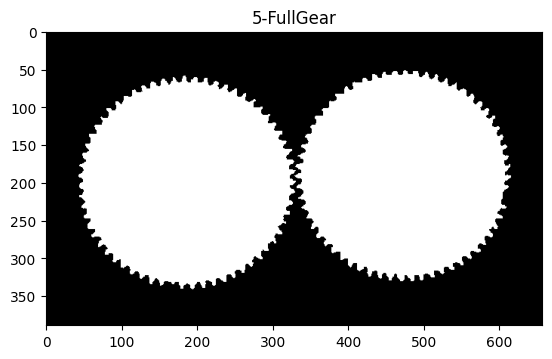

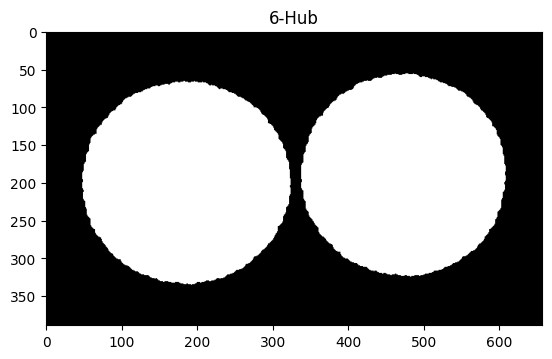

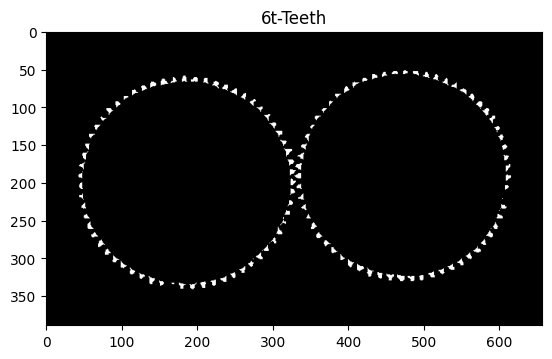

In [104]:
# Define the size of the circular structuring element
radius = 10
size = (2 * radius + 1, 2 * radius + 1)

# Create the circular structuring element
circular_strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)

# Perform morphological operation-opening on img_g_5 using circular_strel
img_g_6 = cv2.morphologyEx(img_g_5, cv2.MORPH_OPEN, circular_strel)

# Subtract img_g_6 from img_g_5
img_g_6t = img_g_5 - img_g_6

# Display img_g_5
plt.imshow(img_g_5, cmap='gray'); plt.title('5-FullGear')
plt.show()

# Display img_g_6
plt.imshow(img_g_6, cmap='gray'); plt.title('6-Hub'); plt.show()

# Display img_g_6b
plt.imshow(img_g_6t, cmap='gray'); plt.title('6t-Teeth'); plt.show()
